In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=10000,noise=0.4)

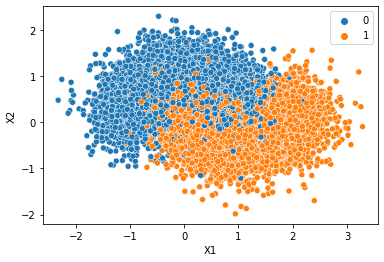

In [32]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.xlabel("X1")
plt.ylabel("X2");

## Voting

In [33]:
lr = LogisticRegression()
svc = SVC()
knc = KNeighborsClassifier()
vtg_clf_hard = VotingClassifier(estimators=[("lr",LogisticRegression()),("svc",SVC()),("knc",KNeighborsClassifier())],
                           voting="hard")
vtg_clf_soft = VotingClassifier(estimators=[("lr",LogisticRegression()),("svc",SVC(probability=True)),("knc",KNeighborsClassifier())],
                           voting="soft")
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,
                                                 test_size=0.2,random_state=42)


for clf in (lr,svc,knc,vtg_clf_hard,vtg_clf_soft):
  clf = clf.fit(X_train,y_train)
  pred = clf.predict(X_test)
  print(f"Accuracy: {accuracy_score(y_test,pred)} Model: {clf.__class__.__name__}")

Accuracy: 0.8355 Model: LogisticRegression
Accuracy: 0.856 Model: SVC
Accuracy: 0.8365 Model: KNeighborsClassifier
Accuracy: 0.854 Model: VotingClassifier
Accuracy: 0.8525 Model: VotingClassifier


## Bagging and Pasting

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()
bg_clf_bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                               bootstrap=True,n_estimators=30)
bg_clf_past = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                bootstrap=False,n_estimators=30)

dtr = dtr.fit(X_train,y_train)
pred_dtr = dtr.predict(X_test)
print(f"Acc: {accuracy_score(y_test,pred_dtr)} Classifier: {dtr.__class__.__name__}")

bg_clf_bag = bg_clf_bag.fit(X_train,y_train)
pred_bag = bg_clf_bag.predict(X_test)
print(f"Acc: {accuracy_score(y_test,pred_bag)} Classifier: Bagging")

bg_clf_past = bg_clf_past.fit(X_train,y_train)
pred_past = bg_clf_past.predict(X_test)
print(f"Acc: {accuracy_score(y_test,pred_past)} Classifier: Pasting")

Acc: 0.789 Classifier: DecisionTreeClassifier
Acc: 0.8305 Classifier: Bagging
Acc: 0.788 Classifier: Pasting


## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=30)
bg_clf = BaggingClassifier(n_estimators=30,base_estimator=DecisionTreeClassifier())

rnd_clf = rnd_clf.fit(X_train,y_train)
pred_rnd = rnd_clf.predict(X_test)
print(f"Acc: {accuracy_score(y_test,pred_rnd)} Classifier: {rnd_clf.__class__.__name__}")

bg_clf = bg_clf.fit(X_train,y_train)
pred_bag = bg_clf.predict(X_test)
print(f"Acc: {accuracy_score(y_test,pred_bag)} Classifier: Bagging")

Acc: 0.8295 Classifier: RandomForestClassifier
Acc: 0.832 Classifier: Bagging


In [36]:
bg_rnd = BaggingClassifier(n_estimators=30,bootstrap=False,bootstrap_features=True)
bg_rnd = bg_rnd.fit(X_train,y_train)
pred_br = bg_rnd.predict(X_test)
print(f"Acc: {accuracy_score(y_test,pred_br)} Classifier: RandomForest using Bagging")

Acc: 0.7905 Classifier: RandomForest using Bagging


### OOB

In [37]:
rnd_clf = RandomForestClassifier(n_estimators=30,oob_score=True)
bg_clf = BaggingClassifier(n_estimators=30,base_estimator=DecisionTreeClassifier(),
                           oob_score=True)

rnd_clf = rnd_clf.fit(X_train,y_train)
pred_rnd = rnd_clf.predict(X_test)
print(f"Acc: {accuracy_score(y_test,pred_rnd)} Classifier: {rnd_clf.__class__.__name__} OOB: {rnd_clf.oob_score_}")

bg_clf = bg_clf.fit(X_train,y_train)
pred_bag = bg_clf.predict(X_test)
print(f"Acc: {accuracy_score(y_test,pred_bag)} Classifier: Bagging OOB: {bg_clf.oob_score_}")

Acc: 0.8385 Classifier: RandomForestClassifier OOB: 0.842875
Acc: 0.835 Classifier: Bagging OOB: 0.834375


In [38]:
def plot_decision_boundary(classifier,X,y,resolution=0.02,markers=None,colors=None):
    """
    This is a function that is used to visualize the boundaries predicted by classifiers to classify the training data.
    This function only takes uses two features even if more than two are given.
    :param classifier: classifier model that is used to predict the labels
    :param X: training data
    :param y: training label
    :param resolution: resolution of the plot
    :param markers: markers for different classes
    :param colors: colors for different classes
    :return: a figure consisting of the boundaries for each class
    """

    import matplotlib.pyplot as plt
    import seaborn as sns

    if markers==None:
        markers = ['*','s','o']
    if colors==None:
        colors = ['blue','red','orange']

    x_min,x_max = X[:,0].min()-0.1,X[:,0].max()+0.1  # x-axis range
    y_min,y_max = X[:,1].min()-0.1,X[:,1].max()+0.1  # y_axis range

    xx,yy = np.meshgrid(np.arange(x_min,x_max,resolution),
                        np.arange(y_min,y_max,resolution))  # creating a 2x2 array for the figure

    y_unq = np.unique(y)    
    classifier = classifier.fit(X,y)
    Z = classifier.predict(np.c_[np.ravel(xx),np.ravel(yy)])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z)  # the contour plot
    

    for i,j in enumerate(y_unq):
        plt.scatter(X[y==j,0],X[y==j,1],color=colors[i],marker=markers[i],label=j)

    plt.legend()
    plt.show()

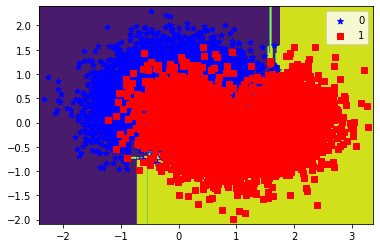

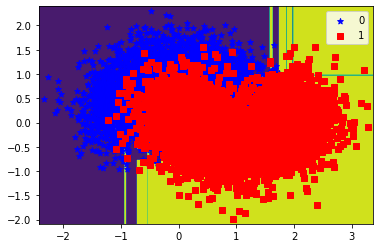

In [39]:
plt.subplot(1,1,1)
plot_decision_boundary(RandomForestClassifier(n_estimators=30),X=X,y=y)
plt.subplot(1,1,1)
plot_decision_boundary(DecisionTreeClassifier(),X=X,y=y)